In [115]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from fbprophet import Prophet

import os
print(os.listdir("./"))

['pm10_and_lead_agg_merged_weka.csv', 'CO2-prophet.ipynb', 'forecasted_11', 'forcasted_x_y.csv', '.DS_Store', 'AQI.csv', 'wind_1.csv', 'so2.csv', 'Untitled.ipynb', 'aggregated_gasses_weka.csv', 'TOTAL.csv', 'temp_latest.csv', 'model.pickle', 'aggregated_gasses.csv', 'Ozone.csv', 'forecasting.ipynb', 'pm10_and_lead_agg_merged.csv', 'FS.csv', 'dewpoint.csv', 'X_Y_updated_with_weka.csv', '.ipynb_checkpoints', 'forecasted', 'pressure.csv', 'CO.csv', 'NO.csv']


In [116]:
gasses_df = pd.read_csv('./aggregated_gasses_weka.csv',encoding= 'unicode_escape',index_col='year_month', parse_dates=['year_month'])
pm_df = pd.read_csv('./pm10_and_lead_agg_merged.csv',encoding= 'unicode_escape', parse_dates=['year_month'])

In [117]:
gasses_df = gasses_df['2010-01-01':]

In [118]:
counties = ['Los Angeles', 'Miami-Dade','Berkshire','Harris','Coconino','Maricopa','Aiken','Butler','Duval','Edgefield','Edmonson','Chester','Bullitt','Berks','Yuma','Tarrant','Hanover','Harford','Davidson','Westmoreland','Hinds','Hardin']
len(counties)

22

In [119]:
write_header = True
for county in counties:
    for column_name in ['CO','Ozone','NO','so2']:
        pjme_train = gasses_df[gasses_df.County_Name==county].sort_values(by=['year_month'])[[column_name]]
        pjme_train['cap'] = max(np.max(pjme_train[column_name]), 1)
        pjme_train['floor'] = np.min(pjme_train[column_name])
        print("Unique values",len(pjme_train[column_name].unique()),"column_name", column_name,county,gasses_df[gasses_df.County_Name==county]['State_Name'][0])               
        if pjme_train[column_name].count() < 30:
            continue
        model = Prophet(growth = 'linear',seasonality_mode='multiplicative', daily_seasonality=False,weekly_seasonality=False,yearly_seasonality=False)
        model.add_seasonality(name='monthly', period=12, fourier_order=20)
        model.fit(pjme_train.reset_index() \
                      .rename(columns={'year_month':'ds',
                                       column_name:'y','cap':'cap','floor':'floor'}))
        future = model.make_future_dataframe(periods=139, freq='M',include_history=False)
        future['cap'] = max(np.max(pjme_train[column_name]), 1)
        future['floor'] = np.min(pjme_train[column_name])
        forecast = model.predict(future)
        forecast.ds = forecast.ds + pd.Timedelta(days=1)
        forecast['County_Name'] = county
        forecast['State_Name'] = gasses_df[gasses_df.County_Name==county]['State_Name'][0]
        forecast = forecast.rename(columns={'ds':'year_month',
                                       "yhat":column_name})
        forecast.to_csv(column_name+'_11.csv',index=False, columns=["year_month","County_Name","State_Name",column_name] , mode='a', header=write_header)
    write_header = False

Unique values 114 column_name CO Los Angeles California
Unique values 114 column_name Ozone Los Angeles California
Unique values 114 column_name NO Los Angeles California
Unique values 114 column_name so2 Los Angeles California
Unique values 114 column_name CO Miami-Dade Florida
Unique values 114 column_name Ozone Miami-Dade Florida
Unique values 114 column_name NO Miami-Dade Florida
Unique values 65 column_name so2 Miami-Dade Florida
Unique values 1 column_name CO Berkshire Massachusetts
Unique values 52 column_name Ozone Berkshire Massachusetts
Unique values 1 column_name NO Berkshire Massachusetts
Unique values 1 column_name so2 Berkshire Massachusetts
Unique values 114 column_name CO Harris Texas
Unique values 114 column_name Ozone Harris Texas
Unique values 114 column_name NO Harris Texas
Unique values 114 column_name so2 Harris Texas
Unique values 1 column_name CO Coconino Arizona
Unique values 117 column_name Ozone Coconino Arizona
Unique values 1 column_name NO Coconino Arizona

In [120]:
pm_df['year_month'] = pm_df.year_month.dt.tz_localize(None)
pm_df = pm_df.set_index("year_month")
pm_df = pm_df['2010-01-01':]
gasses_df = pm_df

Unique values 116 column_name lead_avg Los Angeles California


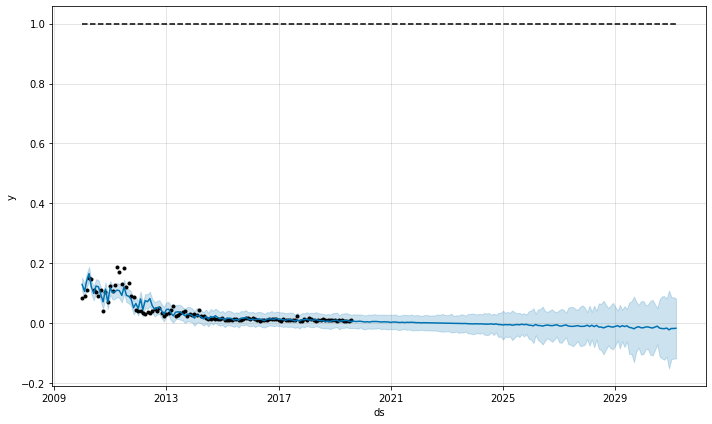

Unique values 115 column_name particulates_pm10_mass_avg Los Angeles California


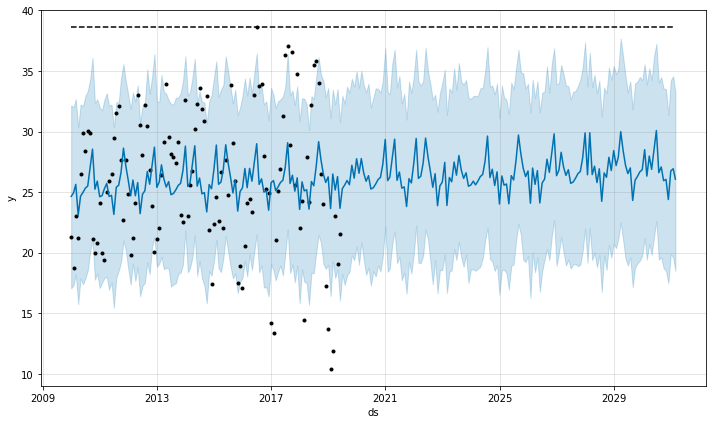

Unique values 1 column_name lead_avg Miami-Dade Florida
Unique values 94 column_name particulates_pm10_mass_avg Miami-Dade Florida


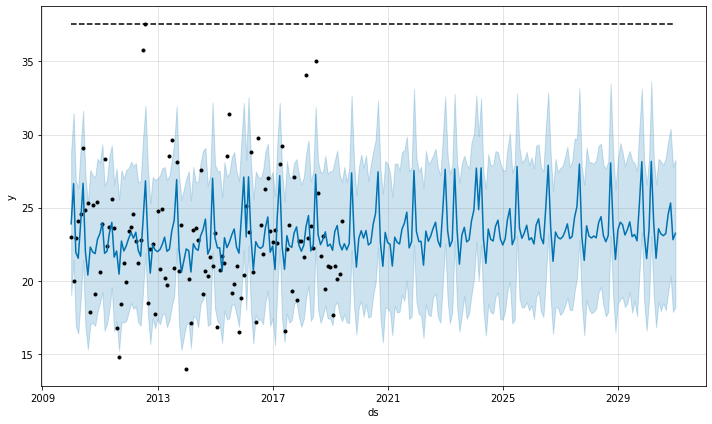

Unique values 75 column_name lead_avg Harris Texas


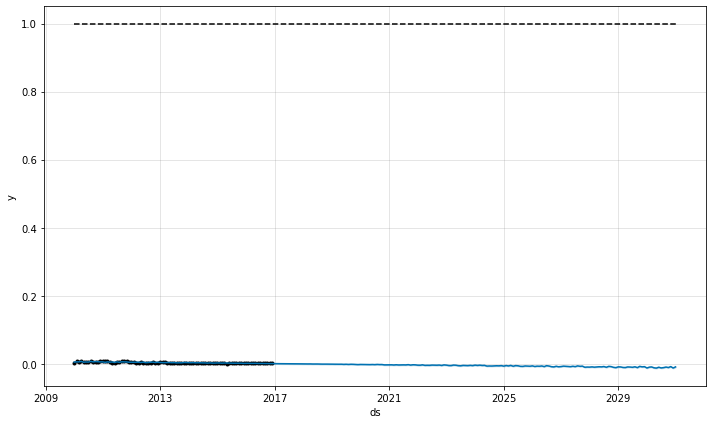

Unique values 111 column_name particulates_pm10_mass_avg Harris Texas


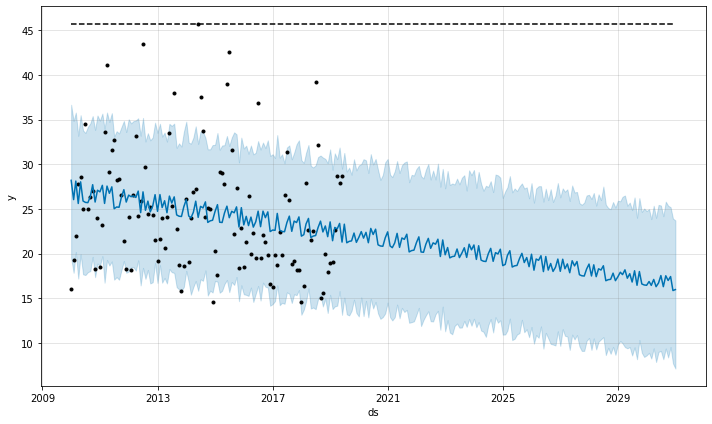

Unique values 1 column_name lead_avg Coconino Arizona
Unique values 47 column_name particulates_pm10_mass_avg Coconino Arizona


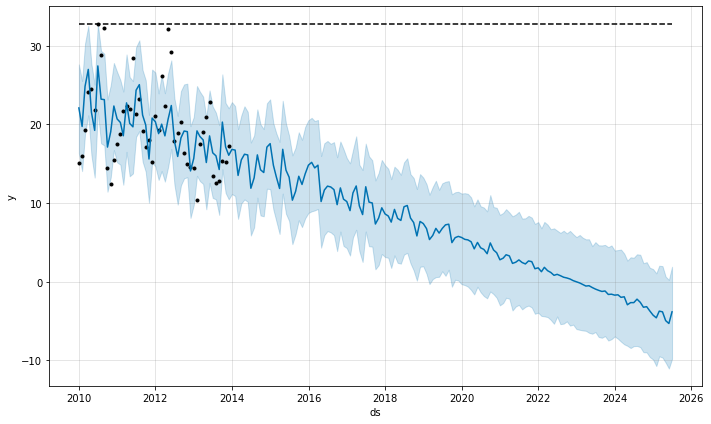

Unique values 110 column_name lead_avg Maricopa Arizona


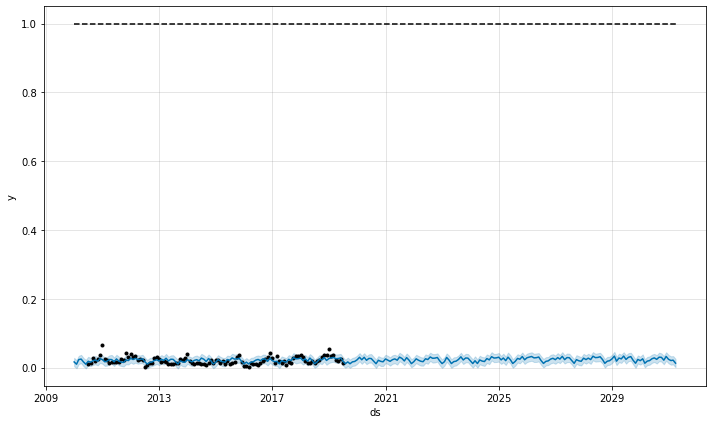

Unique values 117 column_name particulates_pm10_mass_avg Maricopa Arizona


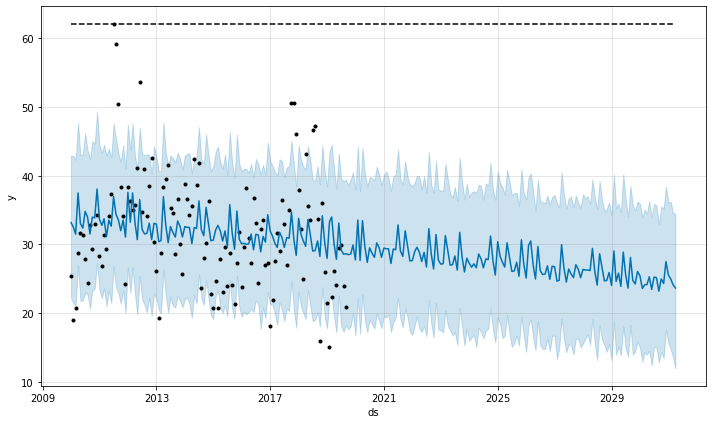

Unique values 91 column_name lead_avg Butler Ohio


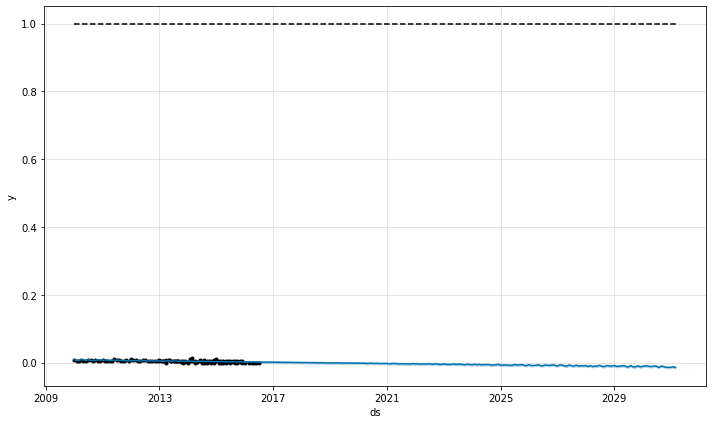

Unique values 110 column_name particulates_pm10_mass_avg Butler Ohio


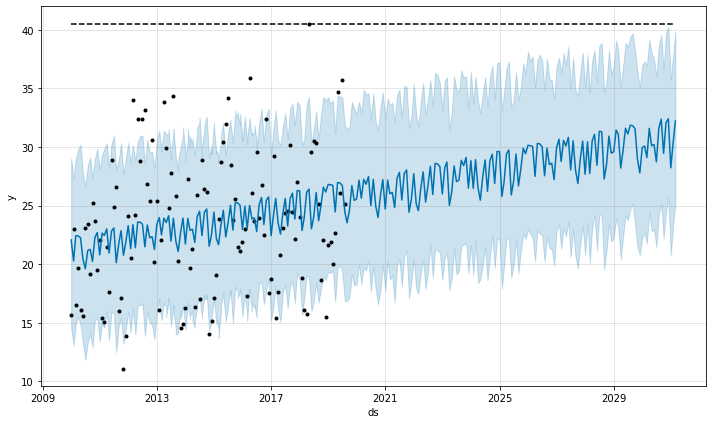

Unique values 1 column_name lead_avg Duval Florida
Unique values 88 column_name particulates_pm10_mass_avg Duval Florida


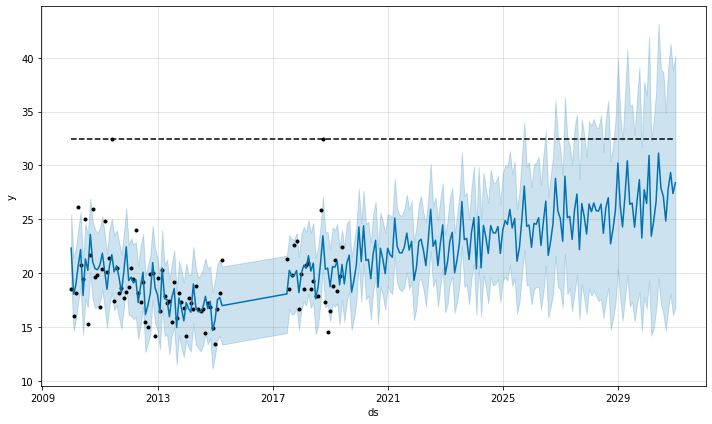

Unique values 114 column_name lead_avg Berks Pennsylvania


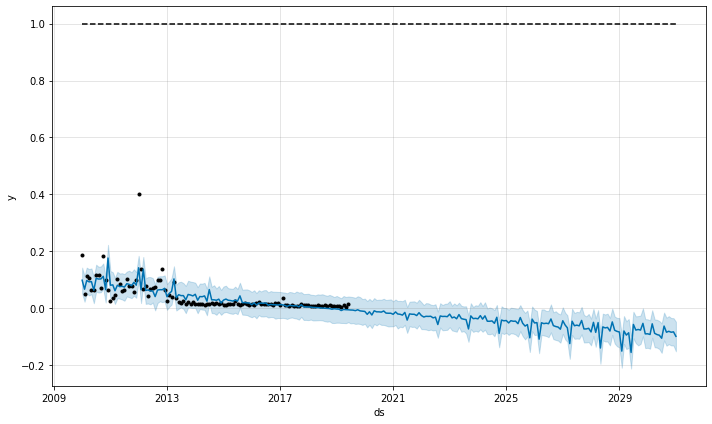

Unique values 54 column_name particulates_pm10_mass_avg Berks Pennsylvania


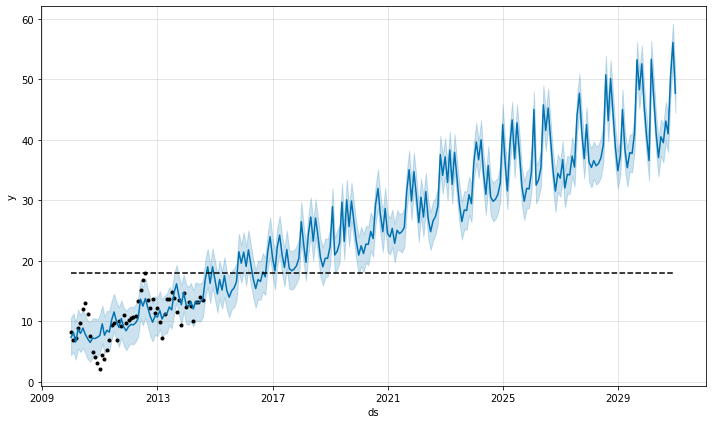

Unique values 1 column_name lead_avg Yuma Arizona
Unique values 116 column_name particulates_pm10_mass_avg Yuma Arizona


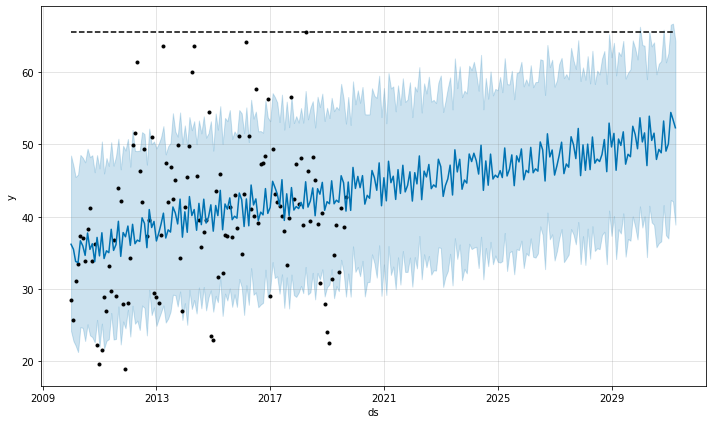

Unique values 1 column_name lead_avg Tarrant Texas
Unique values 86 column_name particulates_pm10_mass_avg Tarrant Texas


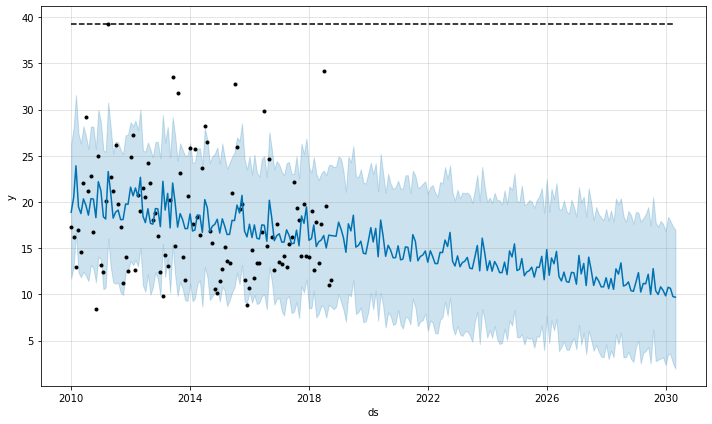

Unique values 1 column_name lead_avg Davidson Tennessee
Unique values 101 column_name particulates_pm10_mass_avg Davidson Tennessee


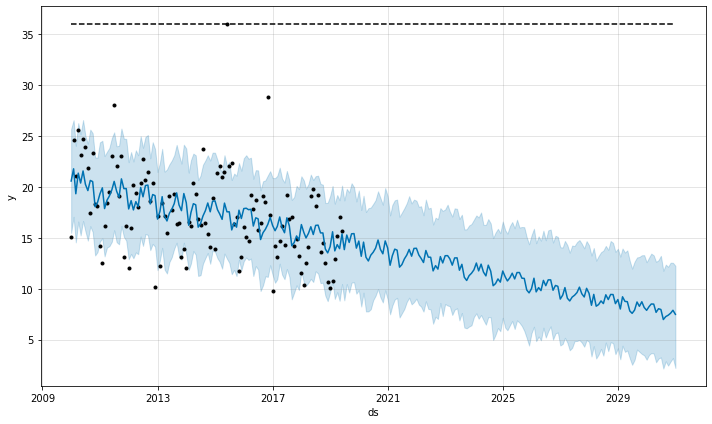

Unique values 39 column_name lead_avg Westmoreland Pennsylvania


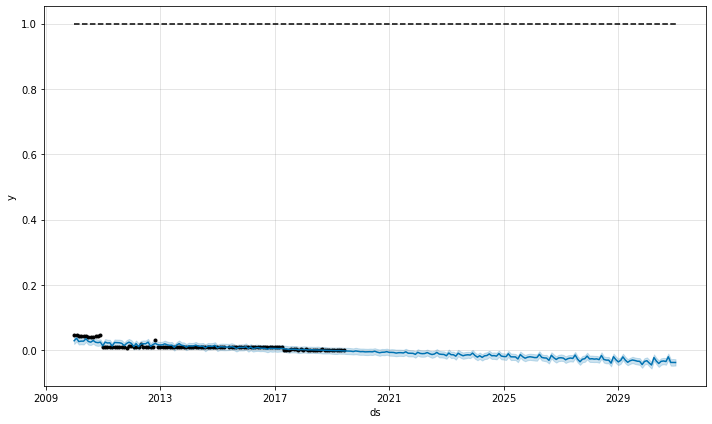

Unique values 1 column_name particulates_pm10_mass_avg Westmoreland Pennsylvania
Unique values 41 column_name lead_avg Hinds Mississippi


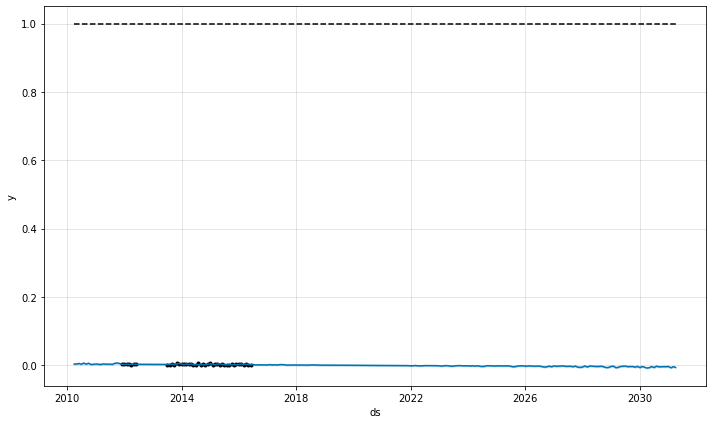

Unique values 90 column_name particulates_pm10_mass_avg Hinds Mississippi


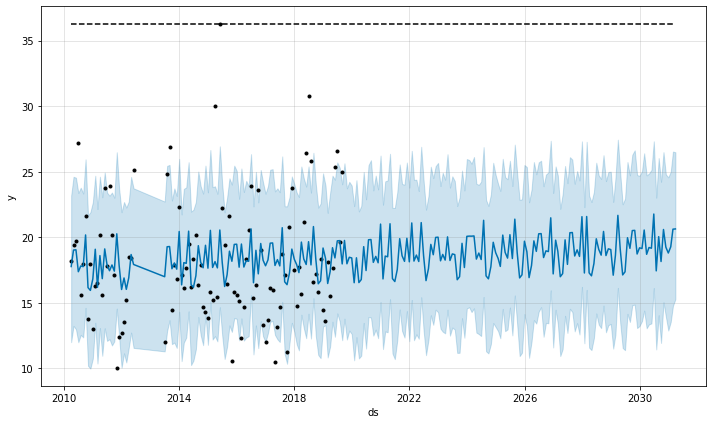

In [121]:
write_header = True
for county in counties:
    for column_name in ['lead_avg','particulates_pm10_mass_avg']:
        if gasses_df[gasses_df.County_Name==county]['State_Name'].count() == 0:
            continue
        pjme_train = gasses_df[gasses_df.County_Name==county].sort_values(by=['year_month'])[[column_name]]
        pjme_train['cap'] = max(np.max(pjme_train[column_name]), 1)
        pjme_train['floor'] = np.min(pjme_train[column_name])
        print("Unique values",len(pjme_train[column_name].unique()),"column_name", column_name,county,gasses_df[gasses_df.County_Name==county]['State_Name'][0])               
        if pjme_train[column_name].count() < 30:
            continue
        model = Prophet(growth = 'linear',seasonality_mode='multiplicative', daily_seasonality=False,weekly_seasonality=False,yearly_seasonality=False)
        model.add_seasonality(name='monthly', period=12, fourier_order=20)
        model.fit(pjme_train.reset_index() \
                      .rename(columns={'year_month':'ds',
                                       column_name:'y','cap':'cap','floor':'floor'}))
        future = model.make_future_dataframe(periods=139, freq='M',include_history=True)
        future['cap'] = max(np.max(pjme_train[column_name]), 1)
        future['floor'] = np.min(pjme_train[column_name])
        forecast = model.predict(future)
        model.plot(forecast)
        plt.show()
        forecast.ds = forecast.ds + pd.Timedelta(days=1)
        forecast = forecast[-142:]
        forecast['County_Name'] = county
        forecast['State_Name'] = gasses_df[gasses_df.County_Name==county]['State_Name'][0]
        forecast = forecast.rename(columns={'ds':'year_month',
                                       "yhat":column_name})
        forecast.to_csv(column_name+'_11.csv',index=False, columns=["year_month","County_Name","State_Name",column_name] , mode='a', header=write_header)
    write_header = False

In [122]:
# write_header = True
# for county in counties:
#     for column_name in ['lead_avg','particulates_pm10_mass_avg']:
#         print(county,pm_df[pm_df.County_Name==county]['State_Name'][0])
#         pjme_train = pm_df[pm_df.County_Name==county].sort_values(by=['year_month'])[[column_name]]
#         print(pjme_train[column_name].count())
#         if pjme_train[column_name].count() < 30:
#             continue
#         model = Prophet(seasonality_mode='multiplicative', mcmc_samples=300)
#         model.fit(pjme_train.reset_index() \
#                       .rename(columns={'year_month':'ds',
#                                        column_name:'y'}))
#         future = model.make_future_dataframe(periods=139, freq='M',include_history=False)
#         forecast = model.predict(future)
#         print("hereee")
#         forecast.ds = forecast.ds + pd.Timedelta(days=1)
#         forecast['County_Name'] = county
#         forecast['State_Name'] = pm_df[pm_df.County_Name==county]['State_Name'][0]
#         forecast = forecast.rename(columns={'ds':'year_month',
#                                        "yhat":column_name})
#         forecast.to_csv(column_name+'.csv',index=False, columns=["year_month","County_Name","State_Name",column_name] , mode='a', header=write_header)
#     write_header = False

In [123]:
wind_df = pd.read_csv('./wind_1.csv',encoding= 'unicode_escape',index_col='year_month', parse_dates=['year_month'])

In [124]:
wind_df = wind_df['2010-01-01':]
gasses_df = wind_df
write_header = True
for county in counties:
    for column_name in ['WIND']:
        if gasses_df[gasses_df.County_Name==county]['State_Name'].count() == 0:
            continue
        pjme_train = gasses_df[gasses_df.County_Name==county].sort_values(by=['year_month'])[[column_name]]
        pjme_train['cap'] = max(np.max(pjme_train[column_name]), 1)
        pjme_train['floor'] = np.min(pjme_train[column_name])
        print("Unique values",len(pjme_train[column_name].unique()),"column_name", column_name,county,gasses_df[gasses_df.County_Name==county]['State_Name'][0])               
        if pjme_train[column_name].count() < 30:
            continue
        model = Prophet(growth = 'linear',seasonality_mode='multiplicative', daily_seasonality=False,weekly_seasonality=False,yearly_seasonality=False)
        model.add_seasonality(name='monthly', period=12, fourier_order=20)
        model.fit(pjme_train.reset_index() \
                      .rename(columns={'year_month':'ds',
                                       column_name:'y','cap':'cap','floor':'floor'}))
        future = model.make_future_dataframe(periods=139, freq='M',include_history=False)
        future['cap'] = max(np.max(pjme_train[column_name]), 1)
        future['floor'] = np.min(pjme_train[column_name])
        forecast = model.predict(future)
        forecast.ds = forecast.ds + pd.Timedelta(days=1)
        forecast['County_Name'] = county
        forecast['State_Name'] = gasses_df[gasses_df.County_Name==county]['State_Name'][0]
        forecast = forecast.rename(columns={'ds':'year_month',
                                       "yhat":column_name})
        forecast.to_csv(column_name+'_11.csv',index=False, columns=["year_month","County_Name","State_Name",column_name] , mode='a', header=write_header)
    write_header = False

Unique values 58 column_name WIND Los Angeles California
Unique values 112 column_name WIND Miami-Dade Florida
Unique values 114 column_name WIND Harris Texas
Unique values 116 column_name WIND Coconino Arizona
Unique values 117 column_name WIND Maricopa Arizona
Unique values 116 column_name WIND Edmonson Kentucky


INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


Unique values 32 column_name WIND Bullitt Kentucky
Unique values 2 column_name WIND Berks Pennsylvania
Unique values 114 column_name WIND Tarrant Texas
Unique values 117 column_name WIND Harford Maryland
Unique values 93 column_name WIND Hinds Mississippi


In [125]:
# write_header = True
# for county in counties:
#     for column_name in ['WIND']:
#         print(county,wind_df[wind_df.County_Name==county]['State_Name'][0])
#         pjme_train = wind_df[wind_df.County_Name==county].sort_values(by=['year_month'])[[column_name]]
#         print(pjme_train[column_name].count())
#         if pjme_train[column_name].count() < 30:
#             continue
#         model = Prophet(seasonality_mode='multiplicative')
#         model.fit(pjme_train.reset_index() \
#                       .rename(columns={'year_month':'ds',
#                                        column_name:'y'}))
#         future = model.make_future_dataframe(periods=139, freq='M',include_history=False)
#         forecast = model.predict(future)
#         forecast.ds = forecast.ds + pd.Timedelta(days=1)
#         forecast['County_Name'] = county
#         forecast['State_Name'] = wind_df[wind_df.County_Name==county]['State_Name'][0]
#         forecast = forecast.rename(columns={'ds':'year_month',
#                                        "yhat":column_name})
#         forecast.to_csv(column_name+'FS.csv',index=False, columns=["year_month","County_Name","State_Name",column_name] , mode='a', header=write_header)
#     write_header = False

In [126]:
dew_df = pd.read_csv('./dewpoint.csv',encoding= 'unicode_escape', parse_dates=['year_month'])
dew_df['year_month'] = pd.to_datetime(dew_df['year_month'].astype(str).str[:-6])
# dew_df['year_month'] = dew_df.year_month.dt.tz_convert(None)
dew_df = dew_df.set_index("year_month")
dew_df.head()

,County_Name,State_Name,RH_DP
year_month,,,
1981-05-01,Cook,Illinois,73.960504
1981-02-01,Bexar,Texas,74.842310
1981-08-01,Chambers,Texas,78.653983
1982-10-01,Adams,Illinois,93.153207
1982-07-01,Rock Island,Illinois,98.859981


In [127]:
gasses_df = dew_df['2010-01-01':]
write_header = True
for county in counties:
    for column_name in ['RH_DP']:
        if gasses_df[gasses_df.County_Name==county]['State_Name'].count() == 0:
            continue
        pjme_train = gasses_df[gasses_df.County_Name==county].sort_values(by=['year_month'])[[column_name]]
        pjme_train['cap'] = max(np.max(pjme_train[column_name]), 1)
        pjme_train['floor'] = np.min(pjme_train[column_name])
        print("Unique values",len(pjme_train[column_name].unique()),"column_name", column_name,county,gasses_df[gasses_df.County_Name==county]['State_Name'][0])               
        if pjme_train[column_name].count() < 30:
            continue
        model = Prophet(growth = 'linear',seasonality_mode='multiplicative', daily_seasonality=False,weekly_seasonality=False,yearly_seasonality=False)
        model.add_seasonality(name='monthly', period=12, fourier_order=20)
        model.fit(pjme_train.reset_index() \
                      .rename(columns={'year_month':'ds',
                                       column_name:'y','cap':'cap','floor':'floor'}))
        future = model.make_future_dataframe(periods=139, freq='M',include_history=False)
        future['cap'] = max(np.max(pjme_train[column_name]), 1)
        future['floor'] = np.min(pjme_train[column_name])
        forecast = model.predict(future)
        forecast.ds = forecast.ds + pd.Timedelta(days=1)
        forecast['County_Name'] = county
        forecast['State_Name'] = gasses_df[gasses_df.County_Name==county]['State_Name'][0]
        forecast = forecast.rename(columns={'ds':'year_month',
                                       "yhat":column_name})
        forecast.to_csv(column_name+'_11.csv',index=False, columns=["year_month","County_Name","State_Name",column_name] , mode='a', header=write_header)
    write_header = False

Unique values 114 column_name RH_DP Los Angeles California
Unique values 115 column_name RH_DP Miami-Dade Florida
Unique values 15 column_name RH_DP Berkshire Massachusetts
Unique values 114 column_name RH_DP Harris Texas
Unique values 116 column_name RH_DP Coconino Arizona
Unique values 117 column_name RH_DP Maricopa Arizona
Unique values 116 column_name RH_DP Edmonson Kentucky
Unique values 68 column_name RH_DP Bullitt Kentucky
Unique values 2 column_name RH_DP Berks Pennsylvania
Unique values 114 column_name RH_DP Tarrant Texas
Unique values 117 column_name RH_DP Harford Maryland
Unique values 93 column_name RH_DP Hinds Mississippi


In [128]:
# write_header = True
# for county in counties:
#     for column_name in ['RH_DP']:
#         print(county,dew_df[dew_df.County_Name==county]['State_Name'][0])
#         pjme_train = dew_df[dew_df.County_Name==county].sort_values(by=['year_month'])[[column_name]]
#         print(pjme_train[column_name].count())
#         if pjme_train[column_name].count() < 30:
#             continue
#         model = Prophet(seasonality_mode='multiplicative')
#         model.fit(pjme_train.reset_index() \
#                       .rename(columns={'year_month':'ds',
#                                        column_name:'y'}))
#         future = model.make_future_dataframe(periods=139, freq='M',include_history=False)
#         forecast = model.predict(future)
#         forecast.ds = forecast.ds + pd.Timedelta(days=1)
#         forecast['County_Name'] = county
#         forecast['State_Name'] = dew_df[dew_df.County_Name==county]['State_Name'][0]
#         forecast = forecast.rename(columns={'ds':'year_month',
#                                        "yhat":column_name})
#         forecast.to_csv(column_name+'FS.csv',index=False, columns=["year_month","County_Name","State_Name",column_name] , mode='a', header=write_header)
#     write_header = False

In [129]:

aqi_df = pd.read_csv('./AQI.csv',encoding= 'unicode_escape', parse_dates=['year_month'])
aqi_df['year_month'] = pd.to_datetime(aqi_df['year_month'].astype(str).str[:-6])
aqi_df = aqi_df.set_index("year_month")
aqi_df.head()

,County_Name,State_Name,AQI
year_month,,,
1980-01-01,Jackson,Alabama,102.064516
1980-05-01,Lauderdale,Alabama,71.806452
1980-04-01,Sacramento,California,53.700000
1980-07-01,Fairfield,Connecticut,171.451613
1980-08-01,Wheeler,Georgia,6.580645


In [130]:
gasses_df = aqi_df['2010-01-01':]
write_header = True
for county in counties:
    for column_name in ['AQI']:
        if gasses_df[gasses_df.County_Name==county]['State_Name'].count() == 0:
            continue
        pjme_train = gasses_df[gasses_df.County_Name==county].sort_values(by=['year_month'])[[column_name]]
        pjme_train['cap'] = max(np.max(pjme_train[column_name]), 1)
        pjme_train['floor'] = np.min(pjme_train[column_name])
        print("Unique values",len(pjme_train[column_name].unique()),"column_name", column_name,county,gasses_df[gasses_df.County_Name==county]['State_Name'][0])               
        if pjme_train[column_name].count() < 30:
            continue
        model = Prophet(growth = 'linear',seasonality_mode='multiplicative', daily_seasonality=False,weekly_seasonality=False,yearly_seasonality=False)
        model.add_seasonality(name='monthly', period=12, fourier_order=20)
        model.fit(pjme_train.reset_index() \
                      .rename(columns={'year_month':'ds',
                                       column_name:'y','cap':'cap','floor':'floor'}))
        future = model.make_future_dataframe(periods=139, freq='M',include_history=False)
        future['cap'] = max(np.max(pjme_train[column_name]), 1)
        future['floor'] = np.min(pjme_train[column_name])
        forecast = model.predict(future)
        forecast.ds = forecast.ds + pd.Timedelta(days=1)
        forecast['County_Name'] = county
        forecast['State_Name'] = gasses_df[gasses_df.County_Name==county]['State_Name'][0]
        forecast = forecast.rename(columns={'ds':'year_month',
                                       "yhat":column_name})
        forecast.to_csv(column_name+'_11.csv',index=False, columns=["year_month","County_Name","State_Name",column_name] , mode='a', header=write_header)
    write_header = False

Unique values 107 column_name AQI Los Angeles California
Unique values 102 column_name AQI Miami-Dade Florida
Unique values 107 column_name AQI Berkshire Massachusetts
Unique values 105 column_name AQI Harris Texas
Unique values 104 column_name AQI Coconino Arizona
Unique values 107 column_name AQI Maricopa Arizona
Unique values 81 column_name AQI Aiken South Carolina
Unique values 107 column_name AQI Butler Ohio
Unique values 102 column_name AQI Duval Florida
Unique values 106 column_name AQI Edgefield South Carolina
Unique values 107 column_name AQI Edmonson Kentucky
Unique values 105 column_name AQI Chester Pennsylvania
Unique values 79 column_name AQI Bullitt Kentucky
Unique values 104 column_name AQI Berks Pennsylvania
Unique values 104 column_name AQI Yuma Arizona
Unique values 106 column_name AQI Tarrant Texas
Unique values 65 column_name AQI Hanover Virginia
Unique values 106 column_name AQI Harford Maryland
Unique values 208 column_name AQI Davidson Tennessee
Unique values 106

In [131]:
# write_header = True
# for county in counties:
#     for column_name in ['AQI']:
#         print(county,aqi_df[aqi_df.County_Name==county]['State_Name'][0])
#         pjme_train = aqi_df[aqi_df.County_Name==county].sort_values(by=['year_month'])[[column_name]]
#         print(pjme_train[column_name].count())
#         if pjme_train[column_name].count() < 30:
#             continue
#         model = Prophet(seasonality_mode='multiplicative')
#         model.fit(pjme_train.reset_index() \
#                       .rename(columns={'year_month':'ds',
#                                        column_name:'y'}))
#         future = model.make_future_dataframe(periods=139, freq='M',include_history=False)
#         forecast = model.predict(future)
#         forecast.ds = forecast.ds + pd.Timedelta(days=1)
#         forecast['County_Name'] = county
#         forecast['State_Name'] = aqi_df[aqi_df.County_Name==county]['State_Name'][0]
#         forecast = forecast.rename(columns={'ds':'year_month',
#                                        "yhat":column_name})
#         forecast.to_csv(column_name+'FS.csv',index=False, columns=["year_month","County_Name","State_Name",column_name] , mode='a', header=write_header)
#     write_header = False

In [132]:

pressure_df = pd.read_csv('./pressure.csv',encoding= 'unicode_escape', parse_dates=['year_month'])
pressure_df['year_month'] = pd.to_datetime(pressure_df['year_month'].astype(str).str[:-6])
pressure_df = pressure_df.set_index("year_month")
pressure_df.head()

,County_Name,State_Name,PRESS
year_month,,,
1981-05-01,Cook,Illinois,73.960504
1981-02-01,Bexar,Texas,84.611749
1981-08-01,Chambers,Texas,77.631449
1982-10-01,Adams,Illinois,93.153207
1982-07-01,Rock Island,Illinois,98.859981


In [133]:
gasses_df = pressure_df['2010-01-01':]
write_header = True
for county in counties:
    for column_name in ['PRESS']:
        if gasses_df[gasses_df.County_Name==county]['State_Name'].count() == 0:
            continue
        pjme_train = gasses_df[gasses_df.County_Name==county].sort_values(by=['year_month'])[[column_name]]
        pjme_train[column_name] = pjme_train[column_name].ffill().bfill()
        pjme_train['cap'] = max(np.max(pjme_train[column_name]), 1)
        pjme_train['floor'] = np.min(pjme_train[column_name])
        print('max',max(np.max(pjme_train[column_name]), 1),"Unique values",len(pjme_train[column_name].unique()),"column_name", column_name,county,gasses_df[gasses_df.County_Name==county]['State_Name'][0])               
        if pjme_train[column_name].count() < 30:
            continue
        model = Prophet(growth = 'logistic')
#         model = Prophet(growth = 'linear',seasonality_mode='multiplicative', daily_seasonality=False,weekly_seasonality=False,yearly_seasonality=False)
#         model.add_seasonality(name='monthly', period=12, fourier_order=20)
        model.fit(pjme_train.reset_index() \
                      .rename(columns={'year_month':'ds',
                                       column_name:'y','cap':'cap','floor':'floor'}))
        future = model.make_future_dataframe(periods=139, freq='M',include_history=False)
        future['cap'] = max(np.max(pjme_train[column_name]), 1)
        future['floor'] = np.min(pjme_train[column_name])
        forecast = model.predict(future)
#         model.plot(forecast)
#         plt.show()
        forecast.ds = forecast.ds + pd.Timedelta(days=1)
        forecast['County_Name'] = county
        forecast['State_Name'] = gasses_df[gasses_df.County_Name==county]['State_Name'][0]
        forecast = forecast.rename(columns={'ds':'year_month',
                                       "yhat":column_name})
        forecast.to_csv(column_name+'_11.csv',index=False, columns=["year_month","County_Name","State_Name",column_name] , mode='a', header=write_header)
    write_header = False

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


max 998.6261573367647 Unique values 114 column_name PRESS Los Angeles California


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


max 130.22804990410805 Unique values 112 column_name PRESS Miami-Dade Florida


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


max 985.459940592448 Unique values 15 column_name PRESS Berkshire Massachusetts
max 177.23086761910415 Unique values 114 column_name PRESS Harris Texas


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


max 116.86565591607777 Unique values 116 column_name PRESS Coconino Arizona


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


max 107.36472606757307 Unique values 117 column_name PRESS Maricopa Arizona


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


max 589.7137562676713 Unique values 116 column_name PRESS Edmonson Kentucky


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


max 116.14722225765387 Unique values 32 column_name PRESS Bullitt Kentucky


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


max 125.92096863254423 Unique values 2 column_name PRESS Berks Pennsylvania
max 191.449526999704 Unique values 114 column_name PRESS Tarrant Texas


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


max 424.6263887337459 Unique values 117 column_name PRESS Harford Maryland


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


max 115.9610890842253 Unique values 93 column_name PRESS Hinds Mississippi


In [134]:
# write_header = True
# for county in counties:
#     for column_name in ['PRESS']:
#         print(county,pressure_df[pressure_df.County_Name==county]['State_Name'][0])
#         pjme_train = pressure_df[pressure_df.County_Name==county].sort_values(by=['year_month'])[[column_name]]
#         print(pjme_train[column_name].count())
#         if pjme_train[column_name].count() < 30:
#             continue
#         model = Prophet(seasonality_mode='multiplicative')
#         model.fit(pjme_train.reset_index() \
#                       .rename(columns={'year_month':'ds',
#                                        column_name:'y'}))
#         future = model.make_future_dataframe(periods=139, freq='M',include_history=False)
#         forecast = model.predict(future)
#         forecast.ds = forecast.ds + pd.Timedelta(days=1)
#         forecast['County_Name'] = county
#         forecast['State_Name'] = pressure_df[pressure_df.County_Name==county]['State_Name'][0]
#         forecast = forecast.rename(columns={'ds':'year_month',
#                                        "yhat":column_name})
#         forecast.to_csv(column_name+'FS.csv',index=False, columns=["year_month","County_Name","State_Name",column_name] , mode='a', header=write_header)
#     write_header = False

In [135]:

temp_df = pd.read_csv('./temp_latest.csv',encoding= 'unicode_escape', parse_dates=['year_month'])
temp_df['year_month'] = pd.to_datetime(temp_df['year_month'].astype(str).str[:-6])
temp_df = temp_df.set_index("year_month")
temp_df.head()

,County_Name,State_Name,TEMP
year_month,,,
1980-07-01,Fairfield,Connecticut,75.366536
1980-01-01,Porter,Indiana,24.631175
1980-07-01,Middlesex,Massachusetts,73.524886
1980-01-01,Berks,Pennsylvania,27.616117
1980-05-01,Dauphin,Pennsylvania,63.510235


Unique values 114 column_name TEMP Los Angeles California


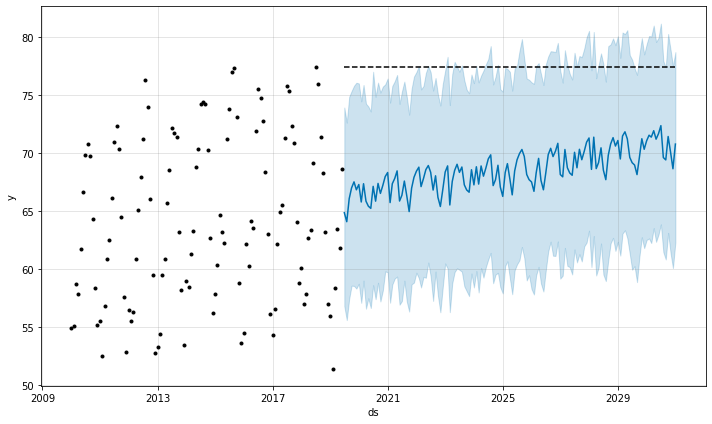

Unique values 113 column_name TEMP Miami-Dade Florida


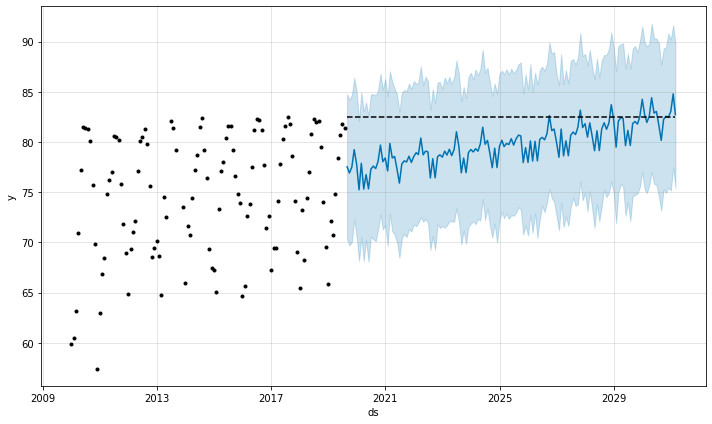

INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


Unique values 15 column_name TEMP Berkshire Massachusetts


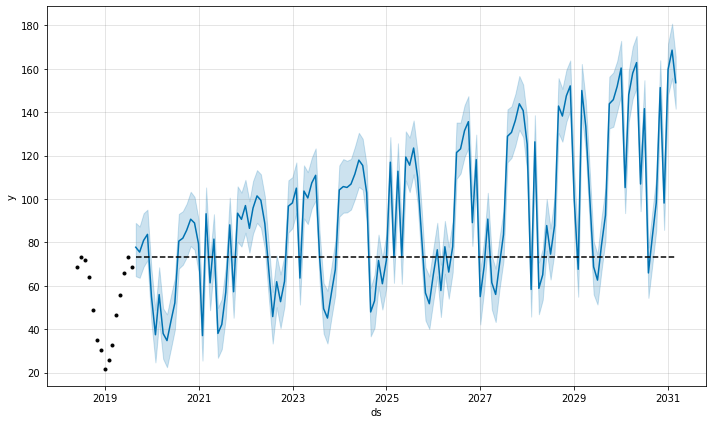

Unique values 114 column_name TEMP Harris Texas


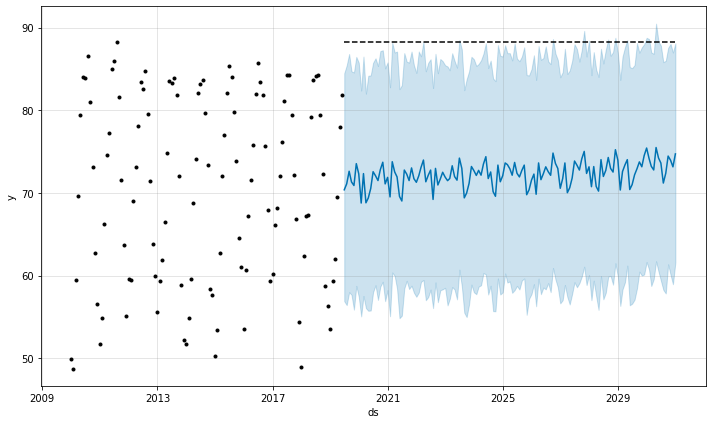

Unique values 115 column_name TEMP Coconino Arizona


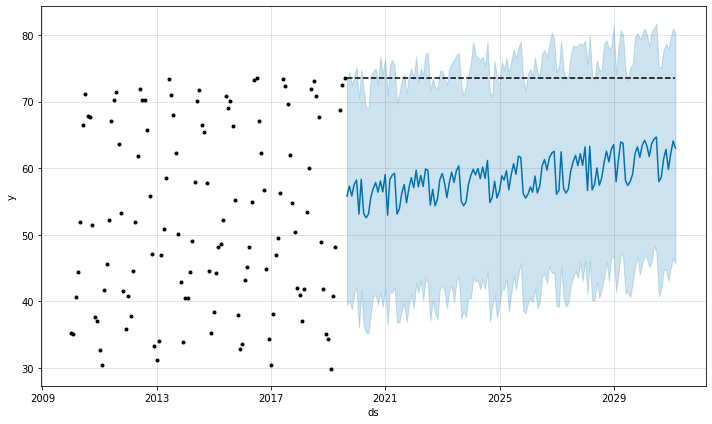

Unique values 117 column_name TEMP Maricopa Arizona


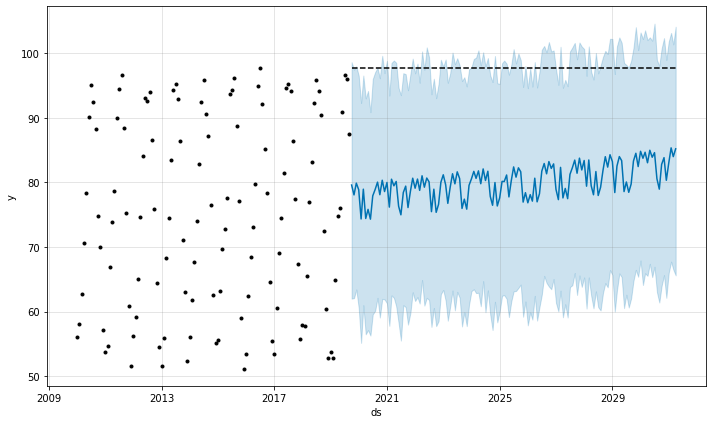

Unique values 116 column_name TEMP Edmonson Kentucky


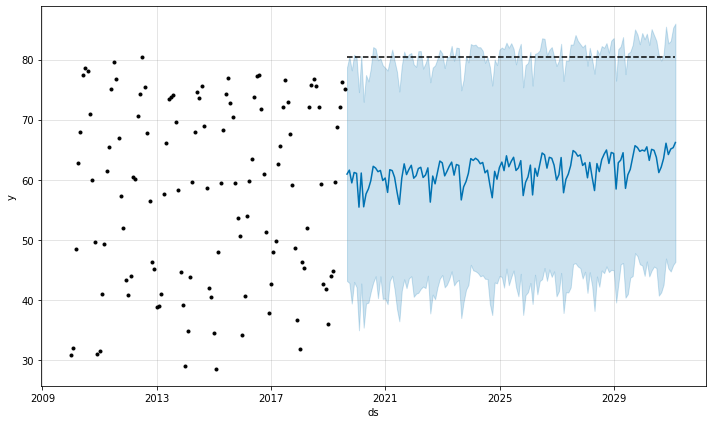

Unique values 68 column_name TEMP Bullitt Kentucky


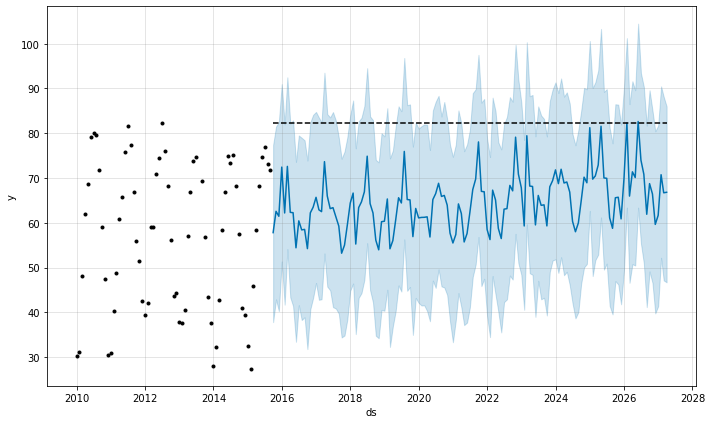

Unique values 114 column_name TEMP Tarrant Texas


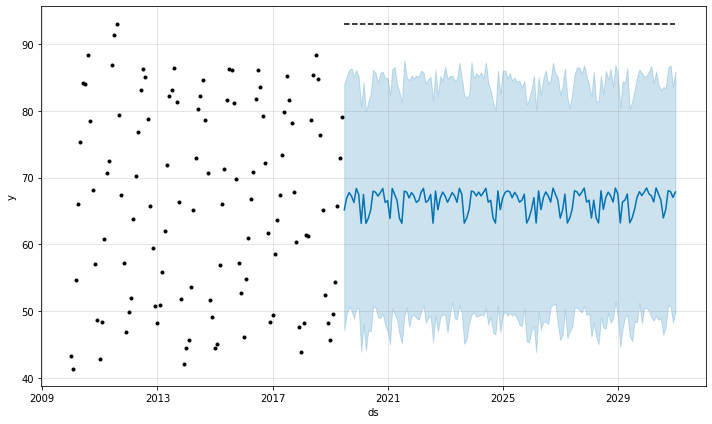

Unique values 117 column_name TEMP Harford Maryland


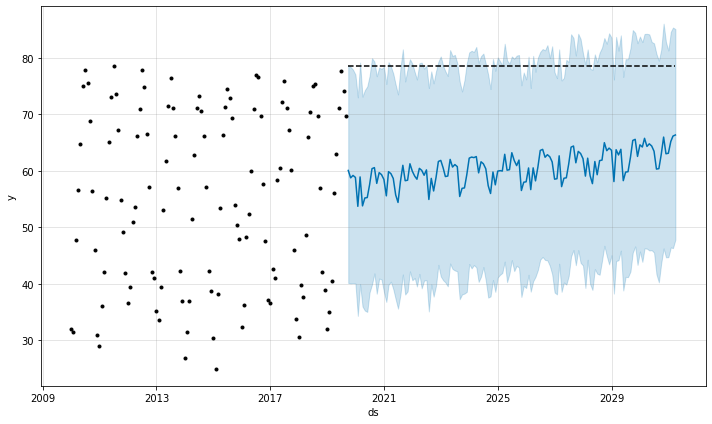

Unique values 92 column_name TEMP Hinds Mississippi


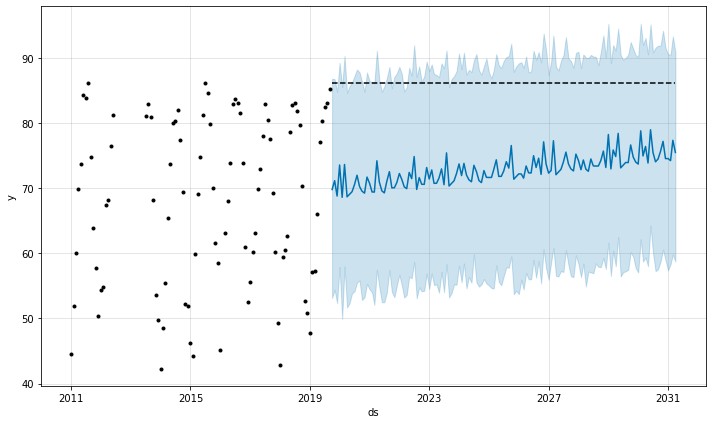

In [136]:
gasses_df = temp_df['2010-01-01':]
write_header = True
for county in counties:
    for column_name in ['TEMP']:
        if gasses_df[gasses_df.County_Name==county]['State_Name'].count() == 0:
            continue
        pjme_train = gasses_df[gasses_df.County_Name==county].sort_values(by=['year_month'])[[column_name]]
        pjme_train['cap'] = max(np.max(pjme_train[column_name]), 1)
        pjme_train['floor'] = np.min(pjme_train[column_name])
        print("Unique values",len(pjme_train[column_name].unique()),"column_name", column_name,county,gasses_df[gasses_df.County_Name==county]['State_Name'][0])               
#         if pjme_train[column_name].count() < 30:
#             continue
        model = Prophet(growth = 'linear',seasonality_mode='multiplicative', daily_seasonality=False,weekly_seasonality=False,yearly_seasonality=False)
        model.add_seasonality(name='monthly', period=12, fourier_order=20)
        model.fit(pjme_train.reset_index() \
                      .rename(columns={'year_month':'ds',
                                       column_name:'y','cap':'cap','floor':'floor'}))
        future = model.make_future_dataframe(periods=139, freq='M',include_history=False)
        future['cap'] = max(np.max(pjme_train[column_name]), 1)
        future['floor'] = np.min(pjme_train[column_name])
        forecast = model.predict(future)
        model.plot(forecast)
        plt.show()
        forecast.ds = forecast.ds + pd.Timedelta(days=1)
        forecast['County_Name'] = county
        forecast['State_Name'] = gasses_df[gasses_df.County_Name==county]['State_Name'][0]
        forecast = forecast.rename(columns={'ds':'year_month',
                                       "yhat":column_name})
        forecast.to_csv(column_name+'_11.csv',index=False, columns=["year_month","County_Name","State_Name",column_name] , mode='a', header=write_header)
    write_header = False

In [103]:
# write_header = True
# for county in counties:
#     for column_name in ['TEMP']:
#         print(county,temp_df[temp_df.County_Name==county]['State_Name'][0])
#         pjme_train = temp_df[temp_df.County_Name==county].sort_values(by=['year_month'])[[column_name]]
#         print(pjme_train[column_name].count())
#         if pjme_train[column_name].count() < 30:
#             continue
#         model = Prophet(seasonality_mode='multiplicative')
#         model.fit(pjme_train.reset_index() \
#                       .rename(columns={'year_month':'ds',
#                                        column_name:'y'}))
#         future = model.make_future_dataframe(periods=139, freq='M',include_history=False)
#         forecast = model.predict(future)
#         forecast.ds = forecast.ds + pd.Timedelta(days=1)
#         forecast['County_Name'] = county
#         forecast['State_Name'] = temp_df[temp_df.County_Name==county]['State_Name'][0]
#         forecast = forecast.rename(columns={'ds':'year_month',
#                                        "yhat":column_name})
#         forecast.to_csv(column_name+'FS.csv',index=False, columns=["year_month","County_Name","State_Name",column_name] , mode='a', header=write_header)
#     write_header = False